In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = '/home/dparks/Downloads/rmotc/DataSets/Seismic/CD files/3D_Seismic/filt_mig.sgy'

In [3]:
# use obspy to read in data
from obspy.io.segy.segy import _read_segy
stream = _read_segy(filename, headonly=True)

In [4]:
#Save each trace with it's xline and inline indexs
traces_with_indexes = [] # [(inline, xline, trace_samples), ...]

for trace in stream.traces:
    x = trace.header.x_coordinate_of_ensemble_position_of_this_trace - 1
    y = trace.header.y_coordinate_of_ensemble_position_of_this_trace - 1

    traces_with_indexes.append((x,y, trace.data))

In [5]:
#find the extents of the traces in inline and xline
x_max = max(traces_with_indexes, key = lambda x: x[0])[0]
y_max = max(traces_with_indexes, key = lambda x: x[1])[1]

print(x_max, y_max)

344 187


In [6]:
#make a np array to save the data into
x_len = x_max + 1
y_len = y_max + 1
s_len = len(traces_with_indexes[0][2])
threeDSamples = np.zeros((x_len, y_len, s_len))

In [7]:
# put all traces in the np array
for xy_trace in traces_with_indexes:
    x = xy_trace[0]
    y = xy_trace[1]
    samples = xy_trace[2]
    threeDSamples[x, y] = samples

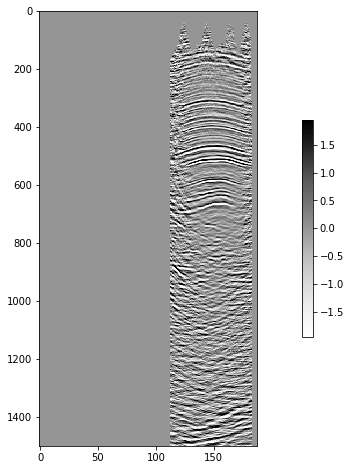

In [8]:
#plot a slice from the dataset
vm = np.percentile(threeDSamples, 99)


plt.figure(figsize=(16,8))
plt.imshow(threeDSamples[50].T, cmap="Greys", vmin=-vm, vmax=vm, aspect=0.25)
plt.colorbar(shrink=0.5)
plt.show()

In [ ]:
# view the data in 3D using mayavi

In [10]:
from mayavi import mlab

In [ ]:
source = mlab.pipeline.scalar_field(threeDSamples)
source.spacing = [1, 1, -0.5]

for axis in ['x', 'z']:
    plane = mlab.pipeline.image_plane_widget(source, 
                                    plane_orientation='{}_axes'.format(axis),
                                    slice_index=100, colormap='gray')
    # Flip colormap. Better way to do this?
    plane.module_manager.scalar_lut_manager.reverse_lut = True

mlab.outline()
mlab.show()